In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
import contractions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [151]:
data_set = pd.read_csv("/content/testdata.manual.2009.06.14.csv")
data_set.columns = ['sentiment','id','date','query','user','tweet_text']

In [152]:
pd.DataFrame(data_set)


,sentiment,id,date,query,user,tweet_text
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
...,...,...,...,...,...,...
510,4,14083,Mon May 11 03:33:38 UTC 2009,nashta,theviewfans,House Correspondents dinner was last night who...
511,4,14084,Mon May 11 05:22:12 UTC 2009,nashta,peterlikewhat,lebron and zydrunas are such an awesome duo
512,4,14085,Mon May 11 05:22:37 UTC 2009,nashta,emceet,@wordwhizkid Lebron is a beast... nobody in th...
513,4,14086,Mon May 11 05:21:45 UTC 2009,nashta,Native_011,@Pmillzz lebron IS THE BOSS


In [153]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   515 non-null    int64 
 1   id          515 non-null    int64 
 2   date        515 non-null    object
 3   query       515 non-null    object
 4   user        515 non-null    object
 5   tweet_text  515 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.3+ KB


In [154]:
data_set.shape

(515, 6)

In [155]:
data_set.describe()

,sentiment,id
count,515.000000,515.000000
mean,2.073786,2297.728155
std,1.706702,3578.021327
min,0.000000,4.000000
25%,0.000000,393.500000
50%,2.000000,1023.000000
75%,4.000000,2380.500000
max,4.000000,14087.000000


In [156]:
data_set["sentiment"].value_counts()

4    197
0    178
2    140
Name: sentiment, dtype: int64

In [157]:
data_set["sentiment"].value_counts(normalize = True)

4    0.382524
0    0.345631
2    0.271845
Name: sentiment, dtype: float64

In [158]:
data_set["id"].value_counts()

14079    4
14080    3
14078    2
14077    2
2185     1
        ..
429      1
428      1
427      1
426      1
14087    1
Name: id, Length: 508, dtype: int64

In [159]:
data_set.isnull().sum()

sentiment     0
id            0
date          0
query         0
user          0
tweet_text    0
dtype: int64

<Axes: >

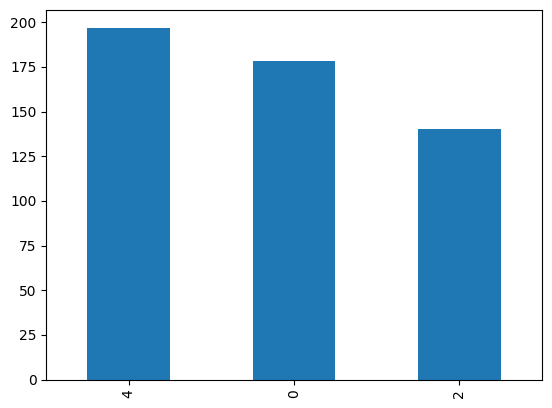

In [160]:
data_set["sentiment"].value_counts().plot(kind = "bar")

In [161]:
import nltk
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'nor', 'during', 'all', 'very', 'in', 'further', 'needn', 'your', 'should', 'such', 'but', 'doing', 'him', 'we', 'after', "wasn't", 'each', 'those', 'what', 'isn', 'yourself', 'under', "you're", 'at', 'if', 'own', 're', 'same', 'our', 'themselves', 've', 'no', 'myself', 'by', 'shan', "doesn't", "shan't", 'the', 'wasn', 'don', 'i', 'whom', "hasn't", 'won', 'so', 'yourselves', "you'll", 'above', 'himself', 'aren', 'yours', 'again', 'most', 'hasn', 'are', 'on', 'where', 'hadn', 'because', 'until', 'weren', 'o', 'then', "haven't", 'doesn', 'out', 'be', 'any', 'were', 'couldn', 'you', 'up', "don't", 'she', 'is', 'hers', 'to', 'while', 'here', 'didn', 'am', 'only', 'between', "aren't", 'theirs', 'have', "didn't", 'or', 'which', "mustn't", 'now', "weren't", 'not', 'being', 'too', "should've", 'do', 'that', 'ourselves', 'their', 'for', 'with', 'other', 'just', 'haven', 'down', 'having', "it's", 'does', 'over', 'how', 'was', 'than', "you've", 'these', 'below', 'through', 'a', 'herself', 'd', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
len(nltk_stopwords)

179

In [163]:
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'nor', 'wherein', 'amoungst', 'detail', 'somehow', 'somewhere', 'further', 'your', 'should', 'might', 'but', 'him', 'after', 'each', 'nevertheless', 'thereafter', 'could', 'except', 'put', 'see', 'fifty', 'never', 'what', 'within', 'would', 'seem', 'whose', 'amount', 'per', 'under', 're', 'describe', 'same', 'almost', 'anywhere', 'our', 'cry', 'rather', 'full', 'thru', 'made', 'find', 'neither', 'thence', 'fifteen', 'no', 'by', 'yourselves', 'sometime', 'found', 'hasnt', 'together', 'yours', 'again', 'are', 'on', 'where', 'though', 'four', 'least', 'top', 'con', 'system', 'throughout', 'ever', 'many', 'none', 'whereas', 'across', 'everyone', 'latter', 'however', 'etc', 'something', 'last', 'therefore', 'already', 'you', 'others', 'please', 'she', 'enough', 'to', 'thin', 'while', 'mine', 'around', 'whole', 'whenever', 'or', 'which', 'ltd', 'namely', 'still', 'now', 'too', 'often', 'elsewhere', 'do', 'that', 'ourselves', 'their', 'with', 'becomes', 'alone', 'another', 'than', 'eight', '

In [164]:
len(sklearn_stopwords)

318

In [165]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'nor', 'during', 'all', 'very', 'in', 'further', 'your', 'should', 'such', 'but', 'we', 'him', 'after', 'each', 'those', 'what', 'yourself', 'under', 'at', 'if', 'own', 're', 'same', 'our', 'themselves', 'no', 'myself', 'by', 'the', 'i', 'whom', 'so', 'yourselves', 'above', 'himself', 'yours', 'again', 'most', 'are', 'on', 'where', 'because', 'until', 'then', 'out', 'be', 'any', 'were', 'you', 'up', 'she', 'is', 'hers', 'to', 'while', 'here', 'am', 'only', 'between', 'have', 'or', 'which', 'now', 'not', 'being', 'too', 'do', 'that', 'ourselves', 'their', 'for', 'with', 'other', 'down', 'over', 'how', 'was', 'than', 'these', 'below', 'through', 'a', 'herself', 'it', 'had', 'my', 'into', 'he', 'me', 'her', 'off', 'can', 'ours', 'there', 'why', 'of', 'some', 'against', 'has', 'itself', 'once', 'its', 'when', 'them', 'an', 'this', 'they', 'both', 'from', 'as', 'his', 'and', 'more', 'who', 'few', 'about', 'before', 'been', 'will'}


In [166]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [167]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [168]:
len(combined_stopwords)

378

In [169]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [170]:
# Text Normalization: Stemming or Lemmatization (prefer
lemmatizer = WordNetLemmatizer()

Define the Cleaner Function & Apply


In [171]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [172]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data_set['tweet_text']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [173]:
print(data_set["tweet_text"][:5])

0    Reading my kindle2...  Love it... Lee childs i...
1    Ok, first assesment of the #kindle2 ...it fuck...
2    @kenburbary You'll love your Kindle2. I've had...
3    @mikefish  Fair enough. But i have the Kindle2...
4    @richardebaker no. it is too big. I'm quite ha...
Name: tweet_text, dtype: object


In [174]:
cleaned_tweets[:5]

['reading my kindle love it lee child is good read ',
 'ok first assesment of the kindle it fucking rock ',
 'you will love your kindle i have had mine for a few month and never looked back the new big one is huge no need for remorse ',
 'fair enough but i have the kindle and i think it is perfect ',
 'no it is too big i am quite happy with the kindle ']

In [175]:
print(data_set["tweet_text"][24])

cleaned_tweets[24]

http://twurl.nl/epkr4b - awesome come back from @biz (via @fredwilson)


'awesome come back from via '

In [176]:
data_set['cleaned_tweets_w/o_SW'] = cleaned_tweets
data_set.head()

,sentiment,id,date,query,user,tweet_text,cleaned_tweets_w/o_SW
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it lee child is good read
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle it fucking rock
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle i have had mine for ...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...,no it is too big i am quite happy with the kin...


3. Data Visualization

3. Data Visualization
Plot the top 25 most common words in this tweets dataset

In [177]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data_set['tweet_text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['Reading', 'my', 'kindle2...', 'Love', 'it...', 'Lee', 'childs', 'is', 'good', 'read.', 'Ok,', 'first', 'assesment', 'of', 'the', '#kindle2', '...it', 'fucking', 'rocks!!!', '@kenburbary', "You'll", 'love', 'your', 'Kindle2.', "I've", 'had', 'mine', 'for', 'a', 'few', 'months', 'and', 'never', 'looked', 'back.', 'The', 'new', 'big', 'one', 'is', 'huge!', 'No', 'need', 'for', 'remorse!', ':)', '@mikefish', 'Fair', 'enough.', 'But']


3150

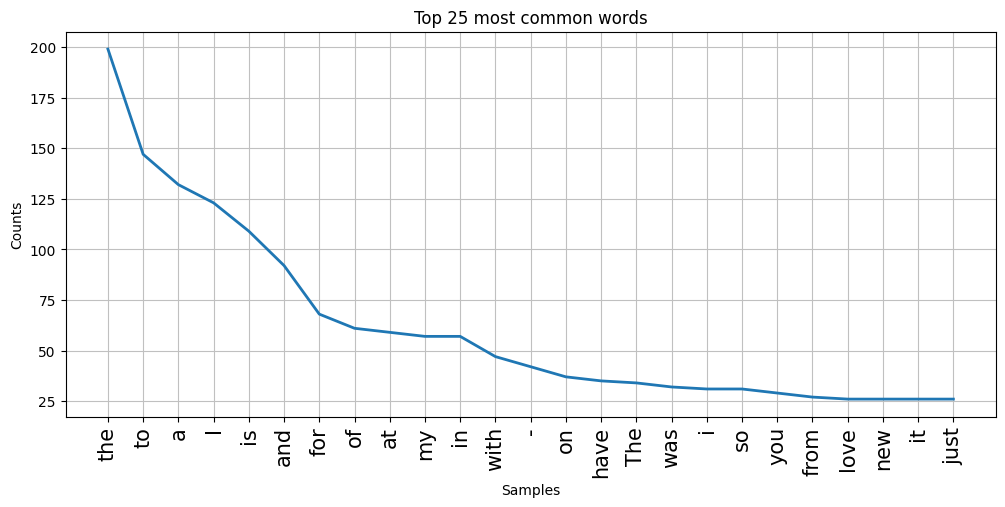

In [178]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

Plot for Cleaned Tweets

In [179]:
all_words = []
for t in data_set['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['reading', 'my', 'kindle', 'love', 'it', 'lee', 'child', 'is', 'good', 'read', 'ok', 'first', 'assesment', 'of', 'the', 'kindle', 'it', 'fucking', 'rock', 'you', 'will', 'love', 'your', 'kindle', 'i', 'have', 'had', 'mine', 'for', 'a', 'few', 'month', 'and', 'never', 'looked', 'back', 'the', 'new', 'big', 'one', 'is', 'huge', 'no', 'need', 'for', 'remorse', 'fair', 'enough', 'but', 'i']


In [180]:
len(set(all_words)) # this is the number of unique words in the list

1852

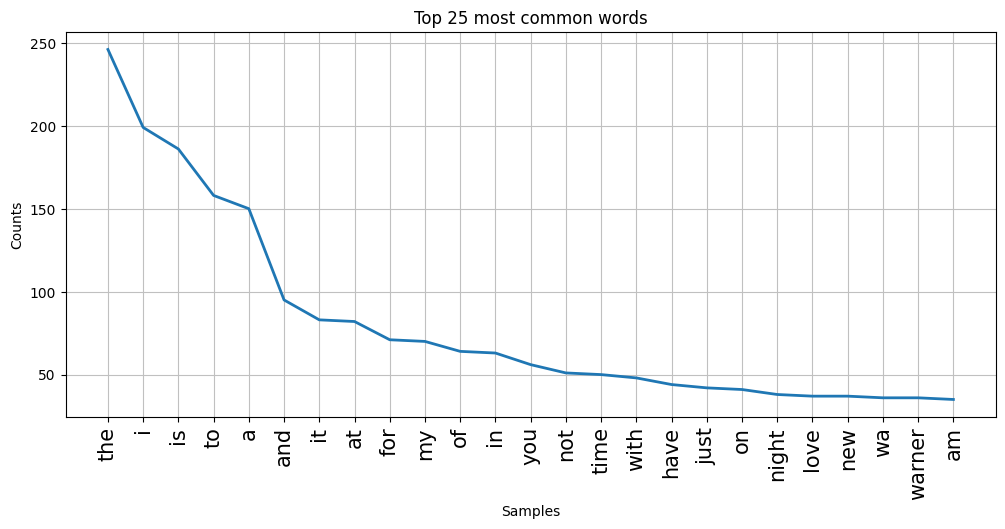

In [181]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


Data Visualization After applying Stop words

In [182]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [183]:
cleaned_tweets = list(data_set['tweet_text'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['reading kindle love lee child good read ', 'assesment kindle fucking rock ', 'love kindle month looked new big huge need remorse ', 'fair kindle think perfect ', 'big quite happy kindle ', 'fuck economy hate aig non loan given ass ', 'jquery new best friend ', 'love twitter ', 'love obama make joke ', 'check video president obama white house correspondent dinner ']


In [184]:
data_set.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'tweet_text',
       'cleaned_tweets_w/o_SW'],
      dtype='object')

In [185]:
data_set['cleaned_tweets_with_SW'] = cleaned_tweets
data_set.head()

,sentiment,id,date,query,user,tweet_text,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it lee child is good read,reading kindle love lee child good read
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle it fucking rock,assesment kindle fucking rock
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle i have had mine for ...,love kindle month looked new big huge need rem...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair kindle think perfect
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...,no it is too big i am quite happy with the kin...,big quite happy kindle


['reading', 'kindle', 'love', 'lee', 'child', 'good', 'read', 'assesment', 'kindle', 'fucking', 'rock', 'love', 'kindle', 'month', 'looked', 'new', 'big', 'huge', 'need', 'remorse', 'fair', 'kindle', 'think', 'perfect', 'big', 'quite', 'happy', 'kindle', 'fuck', 'economy', 'hate', 'aig', 'non', 'loan', 'given', 'ass', 'jquery', 'new', 'best', 'friend', 'love', 'twitter', 'love', 'obama', 'make', 'joke', 'check', 'video', 'president', 'obama']


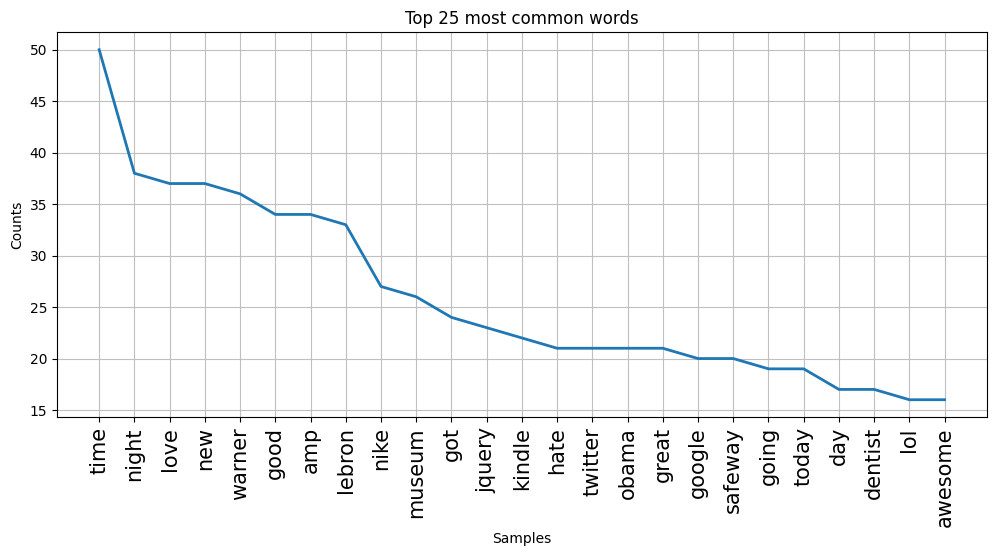

In [186]:
all_words = []
for t in data_set['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [187]:
data_set.head()

,sentiment,id,date,query,user,tweet_text,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it lee child is good read,reading kindle love lee child good read
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle it fucking rock,assesment kindle fucking rock
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,you will love your kindle i have had mine for ...,love kindle month looked new big huge need rem...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...,fair kindle think perfect
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...,no it is too big i am quite happy with the kin...,big quite happy kindle


4. Bag of Words Model (Feature Extraction)

TF-IDF Vectorizer

In [188]:
X = data_set["cleaned_tweets_with_SW"]
Y = data_set["sentiment"]

In [189]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [190]:
print(X)

  (0, 1124)	0.383046205825088
  (0, 1122)	0.39294595568070717
  (0, 839)	0.28026911999080245
  (0, 799)	0.48582329165937366
  (0, 770)	0.31511424718759196
  (0, 596)	0.2779877708828818
  (0, 265)	0.4557629210861453
  (1, 1177)	0.47268809001635
  (1, 770)	0.3888584441639368
  (1, 561)	0.5156878022457106
  (1, 84)	0.5995174480981238
  (2, 1148)	0.40949908120858514
  (2, 947)	0.22716552360278083
  (2, 940)	0.3089241672535938
  (2, 907)	0.3841612797036764
  (2, 839)	0.2362380501259318
  (2, 832)	0.3841612797036764
  (2, 770)	0.2656089094829304
  (2, 687)	0.3841612797036764
  (2, 136)	0.34084602193301305
  (3, 1399)	0.49328700781935536
  (3, 1018)	0.5379913624717928
  (3, 770)	0.3719669489012308
  (3, 494)	0.5734752049979849
  (4, 1112)	0.5616614872706012
  :	:
  (510, 683)	0.27855411873211233
  (510, 603)	0.21379827623560677
  (510, 403)	0.26534618058176235
  (510, 328)	0.2962375622216184
  (510, 111)	0.3230842231573518
  (510, 45)	0.1939694152207894
  (511, 1599)	0.5727475833131148
  (511

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state = 3)

In [195]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))  # train score)
print(model.score(X_test, Y_test))

0.9922279792746114
0.689922480620155


Cross Validation

In [196]:
model.fit(X_train, Y_train)

# evaluating the model
test_data_prediction = model.predict(X_test)

accuracy = accuracy_score(Y_test, test_data_prediction)

print('Accuracy score of the ', model, ' = ', accuracy)


Accuracy score of the  SVC(kernel='linear')  =  0.689922480620155


In [197]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.63106796 0.72815534 0.60194175 0.66990291 0.69902913]
66.6


Hyperparameter Tuning:

GridSearchCV
RandomizedSearchCV

In [199]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [200]:
# grid search
classifier1 = GridSearchCV(model, parameters, cv=5)

In [201]:
# fitting the data to our model
classifier1.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [202]:
classifier1.cv_results_

{'mean_fit_time': array([0.11910725, 0.08364191, 0.09694366, 0.08887506, 0.09192958,
        0.07323627, 0.09983463, 0.12301035, 0.10583482, 0.06398315,
        0.05060968, 0.08317657, 0.05915842, 0.03462386, 0.04842443,
        0.03411212]),
 'std_fit_time': array([0.02048305, 0.02774423, 0.01593445, 0.01866652, 0.01897299,
        0.0204101 , 0.01888732, 0.01449269, 0.03582278, 0.01716056,
        0.01212682, 0.02993824, 0.01500829, 0.00858992, 0.014181  ,
        0.00225308]),
 'mean_score_time': array([0.02127461, 0.01243324, 0.01553974, 0.01490483, 0.01300812,
        0.01568527, 0.02100658, 0.02067795, 0.01157436, 0.00972862,
        0.01231446, 0.01129708, 0.00989614, 0.00635409, 0.01010365,
        0.0053967 ]),
 'std_score_time': array([0.0052281 , 0.00604954, 0.00546306, 0.00329207, 0.00494851,
        0.00720602, 0.00722688, 0.00822665, 0.00500766, 0.00433975,
        0.00423818, 0.00946388, 0.00272645, 0.00287655, 0.00429268,
        0.00123091]),
 'param_C': masked_array(d

In [203]:
# best parameters

best_parameters = classifier1.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'linear'}


In [204]:
# higest accuracy

highest_accuracy = classifier1.best_score_
print(highest_accuracy)

0.6660194174757282


In [206]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier1.cv_results_)

In [207]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119107,0.020483,0.021275,0.005228,1,linear,"{'C': 1, 'kernel': 'linear'}",0.631068,0.728155,0.601942,0.669903,0.699029,0.666019,0.045372,1
1,0.083642,0.027744,0.012433,0.006050,1,poly,"{'C': 1, 'kernel': 'poly'}",0.524272,0.592233,0.553398,0.582524,0.553398,0.561165,0.024096,16
2,0.096944,0.015934,0.015540,0.005463,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.611650,0.679612,0.601942,0.631068,0.728155,0.650485,0.047165,6
3,0.088875,0.018667,0.014905,0.003292,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.631068,0.718447,0.582524,0.660194,0.708738,0.660194,0.050261,5
4,0.091930,0.018973,0.013008,0.004949,5,linear,"{'C': 5, 'kernel': 'linear'}",0.611650,0.689320,0.601942,0.640777,0.650485,0.638835,0.030946,8


In [208]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [209]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.666019
1,1,poly,0.561165
2,1,rbf,0.650485
3,1,sigmoid,0.660194
4,5,linear,0.638835
5,5,poly,0.572816
6,5,rbf,0.666019
7,5,sigmoid,0.638835
8,10,linear,0.633010
9,10,poly,0.572816


RandomizedSearchCV

In [210]:
# grid search
classifier2 = RandomizedSearchCV(model, parameters, cv=5)

In [211]:
# fitting the data to our model
classifier2.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [213]:
# best parameters

best_parameters = classifier2.best_params_
print(best_parameters)

{'kernel': 'rbf', 'C': 10}


In [215]:
# With respect to GridSearchCV
model = svm.SVC(C=1, kernel= 'linear')
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))  # train score)
print(model.score(X_test, Y_test))

0.9922279792746114
0.689922480620155


In [216]:
# With respect to RandomGridSearchCV
model = svm.SVC(C=10, kernel= 'rbf')
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))  # train score)
print(model.score(X_test, Y_test))

1.0
0.6821705426356589
